In [44]:
#Import pandas for the data-structures
import pandas as pd
#import the dataset
df = pd.read_csv('data/winequality-red.csv')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

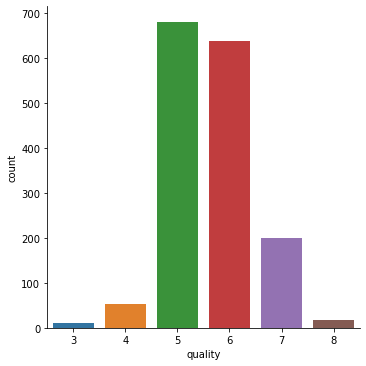

In [5]:
# Let's check the number of values under each quality classification
sns.catplot(x='quality',data= df,  kind='count')

<AxesSubplot:>

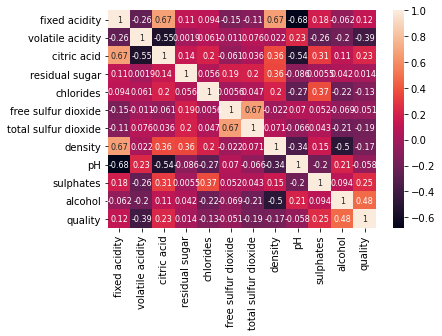

In [7]:
#Correlation in the Dataset
import seaborn as sns
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8})

In [59]:
contigency_table = pd.crosstab(df.quality,df['alcohol'])
contigency_table

alcohol,8.400000,8.500000,8.700000,8.800000,9.000000,9.050000,9.100000,9.200000,9.233333,9.250000,...,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.566667,13.600000,14.000000,14.900000
quality,,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,2,3,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,2,11,0,14,50,0,0,...,4,0,0,0,0,0,0,0,0,1
6,1,0,2,0,16,0,7,17,1,1,...,0,0,1,2,1,1,0,1,4,0
7,0,0,0,0,0,0,0,2,0,0,...,2,0,0,1,1,0,1,3,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,2,0


In [61]:
from scipy.stats.contingency import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

chi_2

1124.521396504002

In [62]:
p_val

5.34532473687669e-90

In [8]:
#Data Preprocessing!
#Let's seperate the data
X=df.iloc[:,0:-1]
y=df.loc[:,'quality']

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [29]:
# let's split the data into train and test split!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.3)

In [30]:
#Now let's train our model using Logistic Regression!
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=.01, solver='sag')
model.fit(X_train,y_train)

LogisticRegression(solver='sag', tol=0.01)

In [31]:
y_pred_train = model.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of the model on training data is:", accuracy)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,X = X_train,y= y_train , cv = 4)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()*100))

Accuracy of the model on training data is: 0.5987488829311886
Accuracy: 58.35 %
Standard Deviation: 2.44


In [32]:
#Now let's train our model using RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred_train = classifier.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy of the model on training data is:", accuracy)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train,y= y_train , cv = 4)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()*100))

Accuracy of the model on training data is: 1.0
Accuracy: 65.68 %
Standard Deviation: 1.75


In [33]:
#Let's check our model performance on the test set!
y_pred_test = classifier.predict(X_test)
accuracy = accuracy_score(y_pred_test, y_test)
print("Accuracy: {:.2f} %".format(accuracy*100))
cf_matrix = confusion_matrix(y_pred_test,y_test)

Accuracy: 65.42 %


In [34]:
cross_val_score(LogisticRegression(tol=.01, solver='sag'),X_scaled,y,cv=4)

array([0.5225    , 0.555     , 0.6025    , 0.61654135])

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   9,   5,   1,   0],
       [  0,   0, 158,  49,   1,   0],
       [  0,   0,  58, 125,  21,   0],
       [  0,   0,   3,  26,  16,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

<AxesSubplot:>

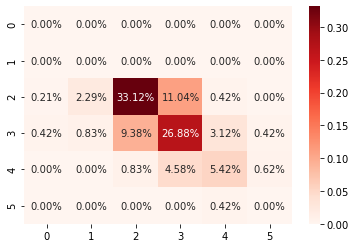

In [39]:
#.  visualizing the confusion matrix!
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.68      0.76      0.72       208
           6       0.60      0.61      0.61       204
           7       0.39      0.36      0.37        45
           8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.29      0.28       480
weighted avg       0.59      0.62      0.60       480



C:\Users\levin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\levin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\levin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
model.intercept_

array([-2.75837102, -0.3707485 ,  2.43931501,  2.59003089,  0.56290866,
       -2.46313504])

In [42]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[ 0.23869172,  0.94617313, -0.28632567, -0.12145466,  0.57301475,
         0.2273309 , -0.3553681 ,  0.25533814,  0.38549695, -0.33415188,
        -0.33910543],
       [ 0.14223147,  0.63548042,  0.17044796,  0.18574429,  0.19363654,
        -0.00930209, -0.10613051, -0.23614755,  0.41721149, -0.19678384,
        -0.68017248],
       [-0.42957097,  0.04165734, -0.01105518, -0.17255535,  0.09193442,
        -0.17563205,  0.66314209,  0.38402196, -0.21564502, -0.42687926,
        -0.63157115],
       [-0.22660511, -0.38812484, -0.23732401, -0.10384333, -0.05193836,
         0.00878907,  0.11796591,  0.33143682, -0.26043436, -0.00194601,
         0.11798656],
       [ 0.4928556 , -0.94090924, -0.12673077,  0.2868741 , -0.26484602,
        -0.07973426, -0.00948273, -0.34731875,  0.13562325,  0.45907718,
         0.52797843],
       [-0.21760272, -0.29427681,  0.49098767, -0.07476505, -0.54180134,
         0.02854844, -0.31012666, -0.38733063, -0.4622523 ,  0.50068381,
         1.004